In [1]:
#import required packages
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np 
#read the data
df = pd.read_csv("AV_Final_19.csv")

#check the dtypes
df.dtypes

Date      object
PM2.5    float64
CO       float64
NH3      float64
NO2      float64
SO2      float64
dtype: object

In [2]:
df.Date = pd.to_datetime(df['Date'])

In [3]:
df.set_index('Date', inplace=True)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 30624 entries, 2016-01-01 00:00:00 to 2019-06-30 23:00:00
Data columns (total 5 columns):
PM2.5    30624 non-null float64
CO       30624 non-null float64
NH3      30624 non-null float64
NO2      30624 non-null float64
SO2      30624 non-null float64
dtypes: float64(5)
memory usage: 1.4 MB


In [5]:
cols = ['CO', 'NH3', 'NO2','SO2']

In [6]:
df.drop(cols, axis=1, inplace=True)

In [22]:
Day = df.resample('W').mean()

In [23]:

#Split Train Test
train = Day.loc['2016-01-01':'2019-03-01']
test = Day.loc['2019-03-01':]

In [24]:
train.fillna(method = 'ffill', inplace=True)

C:\Users\user\Anaconda3\lib\site-packages\pandas\core\frame.py:3787: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)


In [25]:
train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 165 entries, 2016-01-03 to 2019-02-24
Freq: W-SUN
Data columns (total 1 columns):
PM2.5    165 non-null float64
dtypes: float64(1)
memory usage: 2.6 KB


In [26]:
test.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 18 entries, 2019-03-03 to 2019-06-30
Freq: W-SUN
Data columns (total 1 columns):
PM2.5    18 non-null float64
dtypes: float64(1)
memory usage: 288.0 bytes


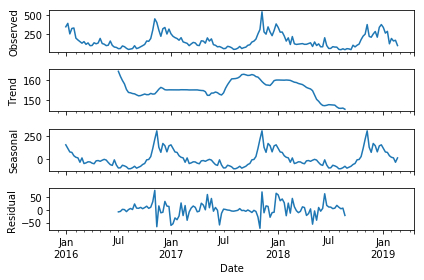

In [27]:
#Decomposing Time Series
import statsmodels.api as sm
sm.tsa.seasonal_decompose(train['PM2.5']).plot()
result = sm.tsa.stattools.adfuller(train['PM2.5'])
plt.show()


In [28]:
# Create prediction table
from statsmodels.tsa.holtwinters import ExponentialSmoothing, Holt
y_hat = test.copy()
fit1 = ExponentialSmoothing(np.asarray(train['PM2.5']),seasonal_periods=3 ,trend='add', seasonal='add').fit()
y_hat['Holt_Winter'] = fit1.forecast(len(test))

In [29]:
test.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 18 entries, 2019-03-03 to 2019-06-30
Freq: W-SUN
Data columns (total 1 columns):
PM2.5    18 non-null float64
dtypes: float64(1)
memory usage: 288.0 bytes


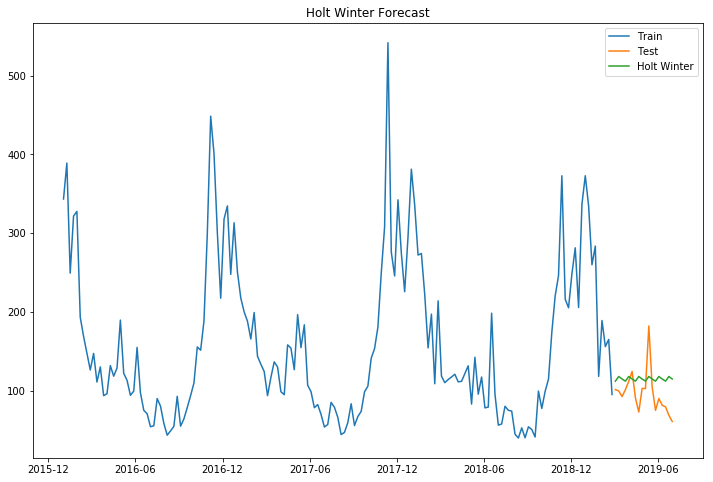

In [30]:
#Plotting data
plt.figure(figsize=(12,8))
plt.plot(train.index, train['PM2.5'], label='Train')
plt.plot(test.index,test['PM2.5'], label='Test')
plt.plot(y_hat.index,y_hat['Holt_Winter'], label='Holt Winter')
plt.legend(loc='best')
plt.title("Holt Winter Forecast")
plt.show()

In [31]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rms = sqrt(mean_squared_error(test['PM2.5'], y_hat.Holt_Winter))
print('RMSE = '+str(rms))

RMSE = 31.452109014608023


In [32]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [33]:
print(mean_absolute_percentage_error(test['PM2.5'], y_hat.Holt_Winter))

30.572907779797443


In [21]:
data.info()

NameError: name 'data' is not defined

# SES

In [34]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
# Create prediction table
fit2 = SimpleExpSmoothing(np.asarray(train['PM2.5'])).fit(smoothing_level=0.6,optimized=False)
y_hat['SES'] = fit2.forecast(len(test))

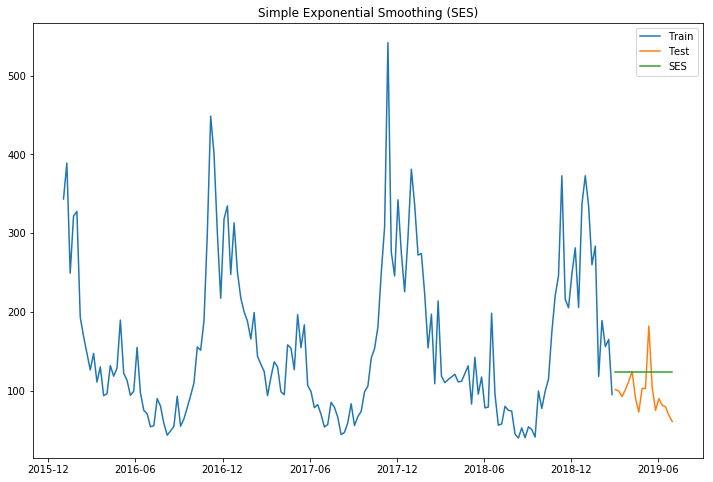

In [35]:
#Plotting data
plt.figure(figsize=(12,8))
plt.plot(train.index, train['PM2.5'], label='Train')
plt.plot(test.index,test['PM2.5'], label='Test')
plt.plot(y_hat.index,y_hat['SES'], label='SES')
plt.legend(loc='best')
plt.title("Simple Exponential Smoothing (SES)")
plt.show()

In [36]:
rms1 = sqrt(mean_squared_error(test['PM2.5'], y_hat.SES))
print('RMSE = '+str(rms1))

RMSE = 37.396120474144126


In [37]:
print(mean_absolute_percentage_error(test['PM2.5'], y_hat.SES))

38.9715589243762
